In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('LoanData.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#create a total income column
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome'],
      dtype='object')

In [8]:
#handle missing values
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [9]:
df.corr()

/var/folders/l0/nstnpmsj4vx3h2j35yqllfcr0000gn/T/ipykernel_31296/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615,0.893037
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.342781
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431,0.620102
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.070917
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000,-0.012563
TotalIncome,0.893037,0.342781,0.620102,-0.070917,-0.012563,1.000000


# of Applicants by Marital Status
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

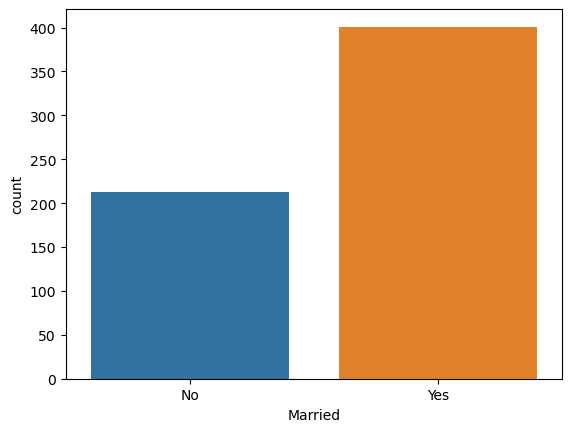

In [10]:
print("# of Applicants by Marital Status")
print(df['Married'].value_counts())
sns.countplot(x = 'Married', data = df)

# of Applicants by Gender
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

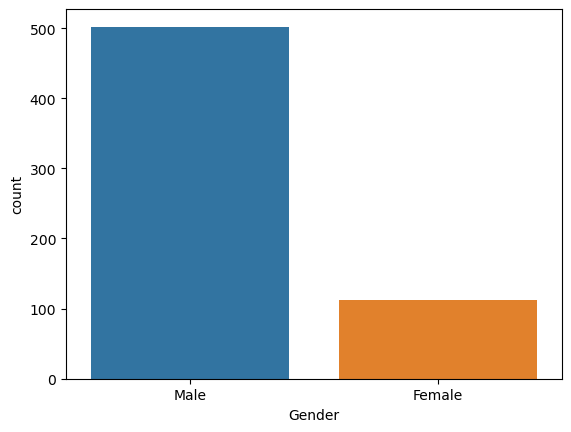

In [11]:
print("# of Applicants by Gender")
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender', data = df)

# of Applicants by Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

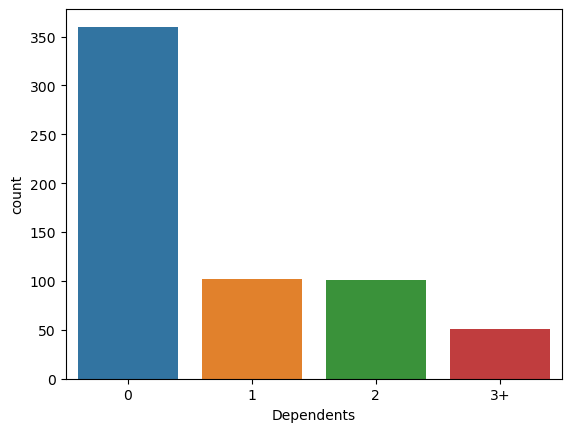

In [12]:
print("# of Applicants by Dependents")
print(df['Dependents'].value_counts())
sns.countplot(x = 'Dependents', data = df)

# of Applicants by Self-Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

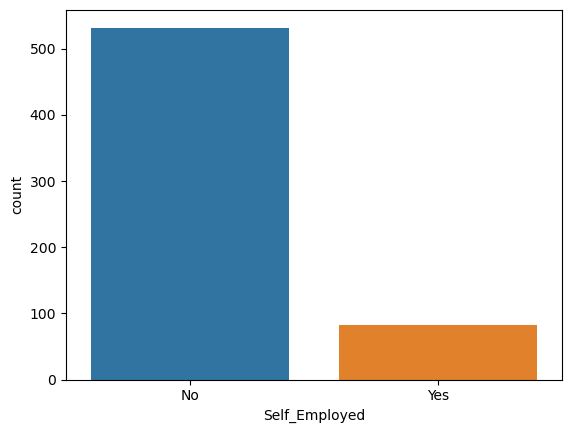

In [13]:
print("# of Applicants by Self-Employed")
print(df['Self_Employed'].value_counts())
sns.countplot(x = 'Self_Employed', data = df)

# of Applicants by Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

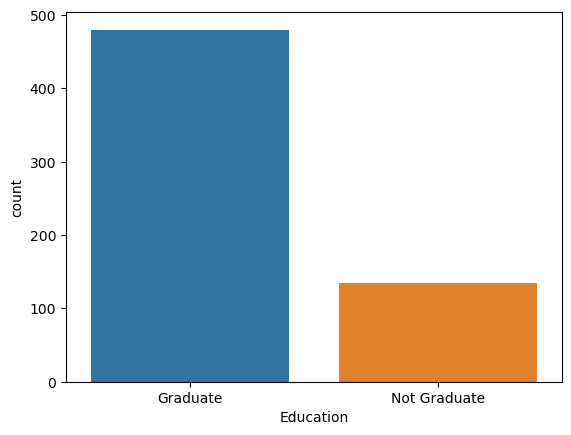

In [14]:
print("# of Applicants by Education")
print(df['Education'].value_counts())
sns.countplot(x = 'Education', data = df)

# of Applicants by Credit History
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

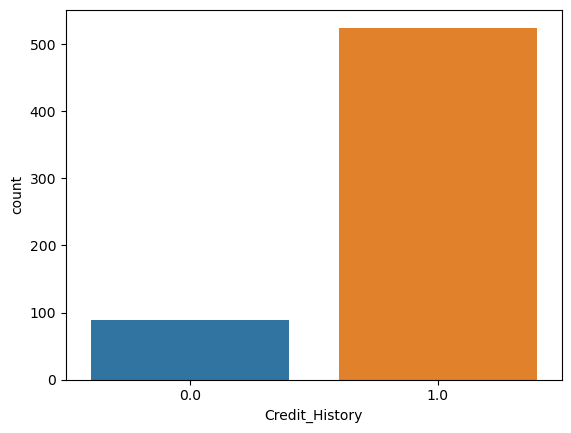

In [15]:
print("# of Applicants by Credit History")
print(df['Credit_History'].value_counts())
sns.countplot(x = 'Credit_History', data = df)

In [16]:
#feature engineering on influential feature, Credit_History
df['Good_Credit_History'] = df['Credit_History'].apply(lambda x: 1 if x == 1 else 0)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Good_Credit_History'] = le.fit_transform(df['Good_Credit_History'])

In [19]:
#identify our target feature: Loan_Status
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

#normalize numeric features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
#Random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 76.42%
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



In [22]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred2))

Accuracy: 78.86%
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [23]:
#K-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred3))

Accuracy: 75.61%
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



In [24]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()
model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred4))

Accuracy: 78.05%
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



Logistic Regression seems to be the best-performing model for our project.

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 0.1}


In [26]:
final_model = LogisticRegression(C=0.1)
final_model.fit(X_train, y_train)

final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Model Accuracy: {final_accuracy * 100:.2f}%")

Final Model Accuracy: 78.86%


Gender: -0.06294135654840173
Married: 0.35930681704348694
Dependents: 0.10744534129853354
Education: -0.17323152095955494
Self_Employed: 0.03533630936421117
ApplicantIncome: -0.031924504725081494
CoapplicantIncome: -0.11493517423304182
LoanAmount: -0.15206250054150489
Loan_Amount_Term: 0.02126640604315773
Credit_History: 1.1560212959800558
Property_Area: 0.08989064229620268
TotalIncome: -0.0926232494614672
Good_Credit_History: 1.1560212959800538


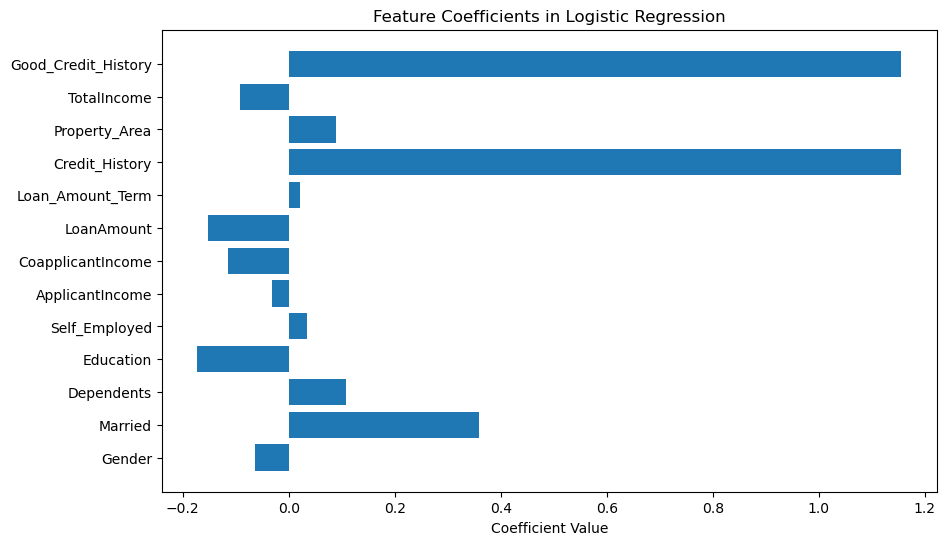

In [27]:
coefficients = final_model.coef_[0]
feature_names = X.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")
    
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Logistic Regression')
plt.show()